<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/Extens%C3%A3o-DS/T%C3%B3pico%2003%20-%20Normalizacao%26Reducao-Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial Normalização, Redução, e Visualização dos dados

No contexto de machine learning, a normalização, redução e visualização dos dados são estratégias fundamentais para preparar os dados antes de alimentá-los em um modelo de aprendizado de máquina. Este tutorial irá explorar essas técnicas em detalhes, discutindo sua importância no processo de preparação dos dados para o treinamento do modelo de aprendizado de máquina. Para isso, vamos utilizar algumas das bibliotecas Python mais populares, incluindo Pandas, Scikit-Learn e Matplotlib.

#Normalização

 A normalização é um processo que envolve a transformação dos dados para um intervalo específico, a fim de tornar as características comparáveis ​​e evitar que algumas tenham um peso maior do que outras. Isso é particularmente importante quando as características possuem escalas diferentes ou quando a distribuição dos dados é assimétrica. Existem várias técnicas de normalização, como a escala min-max, a escala z-score (StandardScaler()). Cada uma delas tem suas vantagens e desvantagens, dependendo das características dos dados e das necessidades do modelo.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

url = "https://www.ppgia.pucpr.br/~aghochuli/DataScience/marketing_campaign_cleaned.csv"

!wget https://www.ppgia.pucpr.br/~aghochuli/DataScience/marketing_campaign_cleaned.csv -O marketing_campaign_cleaned.csv

--2024-08-05 19:36:32--  https://www.ppgia.pucpr.br/~aghochuli/DataScience/marketing_campaign_cleaned.csv
Resolving www.ppgia.pucpr.br (www.ppgia.pucpr.br)... 104.18.11.132, 104.18.10.132, 2606:4700::6812:b84, ...
Connecting to www.ppgia.pucpr.br (www.ppgia.pucpr.br)|104.18.11.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261837 (256K) [text/csv]
Saving to: ‘marketing_campaign_cleaned.csv’

marketing_campaign_ 100%[===================>] 255.70K  --.-KB/s    in 0.007s  

2024-08-05 19:36:32 (36.7 MB/s) - ‘marketing_campaign_cleaned.csv’ saved [261837/261837]



In [2]:
df_ori = pd.read_csv("/content/marketing_campaign_cleaned.csv")
print(df_ori.shape)
df_ori.head()

(2026, 33)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,CustomerAge,Seniority,Relationship_Status,Simplified_Education,TotalChildren,HasChild
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,0,0,0,1,67,11.93,Single,Postgraduate,0,0
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,0,0,0,0,70,10.42,Single,Postgraduate,2,1
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,0,0,0,0,59,10.96,Relationship,Postgraduate,0,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,0,0,0,0,40,10.49,Relationship,Postgraduate,1,1
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,0,0,0,0,43,10.55,Relationship,Postgraduate,1,1


In [3]:
column_filter = ['Income', 'Recency', 'Seniority', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']

df = df_ori[column_filter].copy()

print(df.shape)
df.head()

(2026, 9)


,Income,Recency,Seniority,Wines,Fruits,Meat,Fish,Sweets,Gold
0,58138,58,11.93,635,88,546,172,88,88
1,46344,38,10.42,11,1,6,2,1,6
2,71613,26,10.96,426,49,127,111,21,42
3,26646,26,10.49,11,4,20,10,3,5
4,58293,94,10.55,173,43,118,46,27,15


In [4]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
column_filter = ['Income', 'Recency', 'Seniority', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled.head()


,Income,Recency,Seniority,Wines,Fruits,Meat,Fish,Sweets,Gold
0,0.282951,0.314439,1.541453,0.976677,1.556135,1.667804,2.467009,1.464518,0.863630
1,-0.263153,-0.376097,-1.180156,-0.871972,-0.635570,-0.713358,-0.647167,-0.630442,-0.731724
2,0.906892,-0.790419,-0.206866,0.357498,0.573647,-0.179802,1.349569,-0.148842,-0.031325
3,-1.175241,-0.790419,-1.053989,-0.871972,-0.559994,-0.651624,-0.500617,-0.582282,-0.751179
4,0.290128,1.557405,-0.945846,-0.392034,0.422495,-0.219488,0.158855,-0.004362,-0.556624


<Figure size 200x100 with 0 Axes>

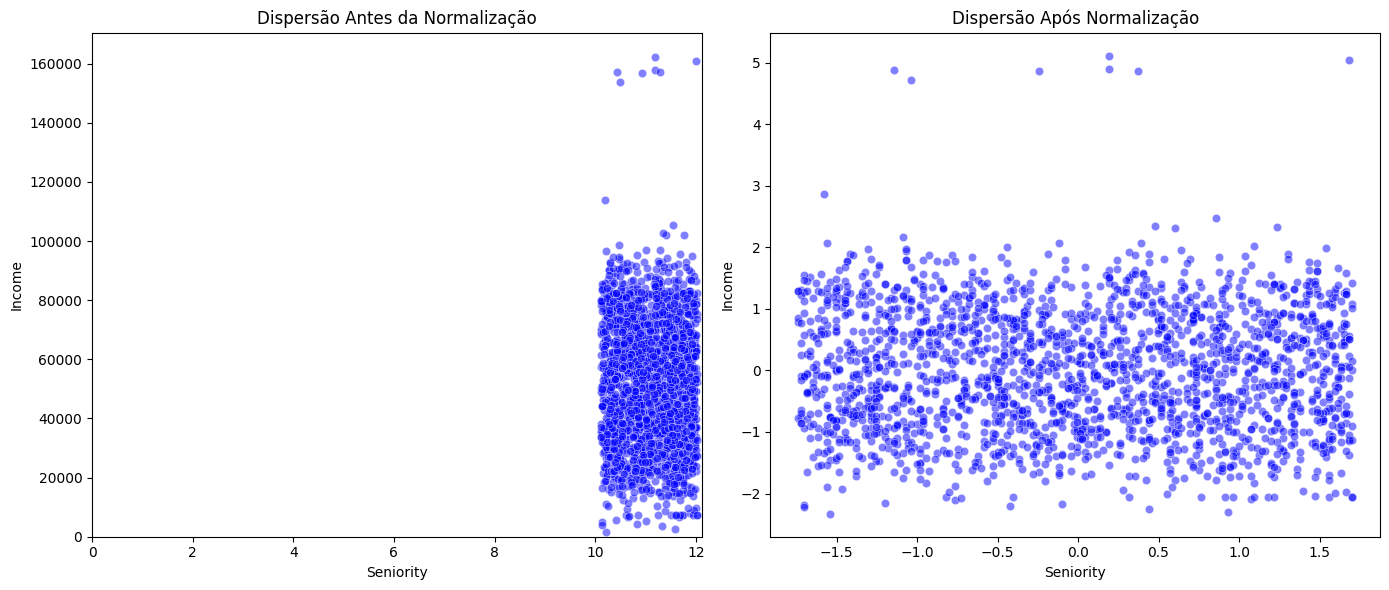

In [5]:
atributo1 = 'Seniority'
atributo2 = 'Income'

plt.figure(figsize=(2,1))
# Criar gráficos de dispersão
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico de dispersão antes da normalização
sns.scatterplot(x=atributo1, y=atributo2, data=df, ax=axes[0], color='blue', alpha=0.5)
axes[0].set_title('Dispersão Antes da Normalização')
axes[0].set_xlabel(atributo1)
axes[0].set_ylabel(atributo2)
axes[0].set_xlim(left=0)  # Definir o limite inferior do eixo x para 0
axes[0].set_ylim(bottom=0)  # Definir o limite inferior do eixo y para 0

# Gráfico de dispersão após a normalização
sns.scatterplot(x=atributo1, y=atributo2, data=df_scaled, ax=axes[1], color='blue', alpha=0.5)
axes[1].set_title('Dispersão Após Normalização')
axes[1].set_xlabel(atributo1)
axes[1].set_ylabel(atributo2)
axes[0].set_xlim(left=0)  # Definir o limite inferior do eixo x para 0
axes[0].set_ylim(bottom=0)  # Definir o limite inferior do eixo y para 0

plt.tight_layout()
plt.show()

#Redução de Caractéristicas

A redução de dados é outra técnica importante que consiste na seleção das características mais relevantes para o modelo, reduzindo a complexidade e melhorando a eficiência do treinamento. Existem diversas técnicas de seleção de características, como a análise de correlação, a análise de componentes principais (PCA), a análise discriminante linear (LDA) e a seleção baseada em modelos. Cada uma dessas técnicas tem suas vantagens e desvantagens, dependendo do tipo de problema e das características dos dados.



## PCA (Principal Component Analisys)

A análise de componentes principais (PCA) é uma técnica de redução de dimensionalidade muito utilizada em problemas de aprendizado de máquina. A PCA é uma técnica estatística que permite a redução de dados multidimensionais, mantendo a maior parte da variância dos dados. Essa técnica consiste na transformação dos dados originais em um novo conjunto de dados, composto por componentes principais, que são combinações lineares das características originais. Os componentes principais são ordenados de acordo com a quantidade de variância que cada um explica nos dados. Dessa forma, os primeiros componentes principais capturam a maior parte da variância dos dados, enquanto os últimos explicam uma quantidade muito pequena. A técnica de PCA é útil para problemas com um grande número de características, pois permite reduzir a dimensão dos dados, eliminando as características menos relevantes e tornando o modelo mais eficiente e menos propenso ao overfitting.

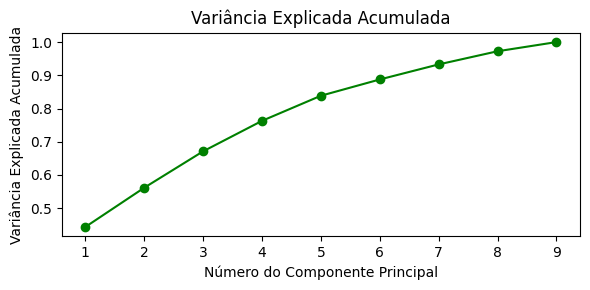

In [15]:
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Criar DataFrame para os componentes principais
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(len(column_filter))])

# Variância explicada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Visualizar os componentes principais
plt.figure(figsize=(6, 3))


plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'o-', color='green')
plt.title('Variância Explicada Acumulada')
plt.xlabel('Número do Componente Principal')
plt.ylabel('Variância Explicada Acumulada')

plt.tight_layout()
plt.show()



#Visualização dos Dados

A visualização dos dados é uma técnica poderosa para entender a relação entre as características e identificar padrões nos dados. As técnicas de visualização mais comuns incluem histogramas, diagramas de dispersão, box plots e mapas de calor. A escolha da técnica de visualização depende das características dos dados e dos objetivos do problema. Além disso, as técnicas de visualização podem ser combinadas com técnicas de redução de dados para visualizar as características mais relevantes.

Abaixo, vamos analisar a dispersão das amostras, reduzindo para 2 e 3 componentes.

## PCA para Visualização

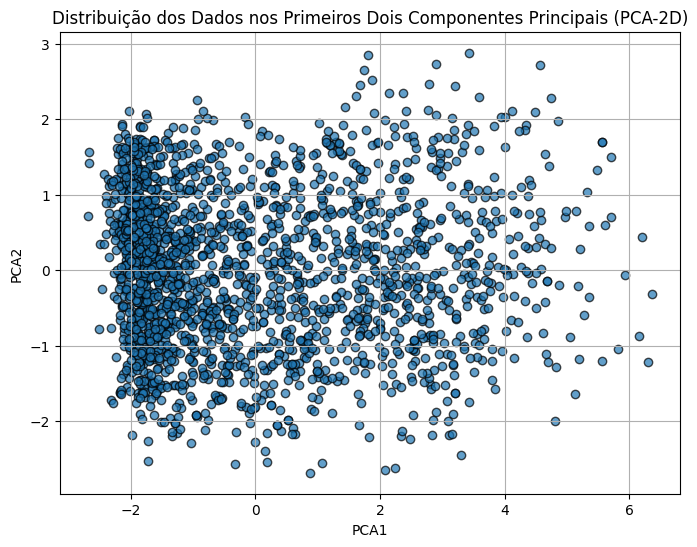

In [7]:
# Aplicar PCA para reduzir para 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Criar DataFrame para os componentes principais
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Visualizar os primeiros dois componentes principais em 2D
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.7, edgecolors='k')
plt.title('Distribuição dos Dados nos Primeiros Dois Componentes Principais (PCA-2D)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()

In [8]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd

# Aplicar PCA para reduzir para 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_scaled)

# Criar DataFrame para os componentes principais
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2', 'PCA3'])

# Visualizar os três primeiros componentes principais em 3D
fig = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='PCA3', title='Distribuição dos Dados nos Três Primeiros Componentes Principais (PCA-3D)')
fig.update_layout(scene=dict(
                    xaxis_title='PCA1',
                    yaxis_title='PCA2',
                    zaxis_title='PCA3'))
fig.show()

# Exercício

Dado o dataset explorado até agora, aplique o Algoritmo K-Means

Determine a redução de dados, determine a quantidade de clusters baseados nas análises de Elbow, e visualize o cluster reduzindo por PCA.

In [9]:
# Aplicar PCA para reduzir para 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

In [10]:
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
from sklearn.decomposition import PCA


pca = PCA(n_components=7)
reduced_df = pca.fit_transform(df_scaled)
reduced_df = pd.DataFrame(reduced_df, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'])
reduced_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,3.641755,-1.191393,-0.314560,-1.102901,-0.760226,-0.279697,-0.753125
1,-1.765722,1.175908,0.175492,0.022511,0.123686,0.039836,-0.013331
2,1.081699,0.758834,-0.558653,-0.081254,-0.065864,-0.410652,-0.530168
3,-2.008060,1.118161,-0.333327,-0.401316,0.038603,-0.030184,-0.102982
4,-0.129148,0.337528,1.874887,-0.396568,-0.166274,-0.306675,0.153858


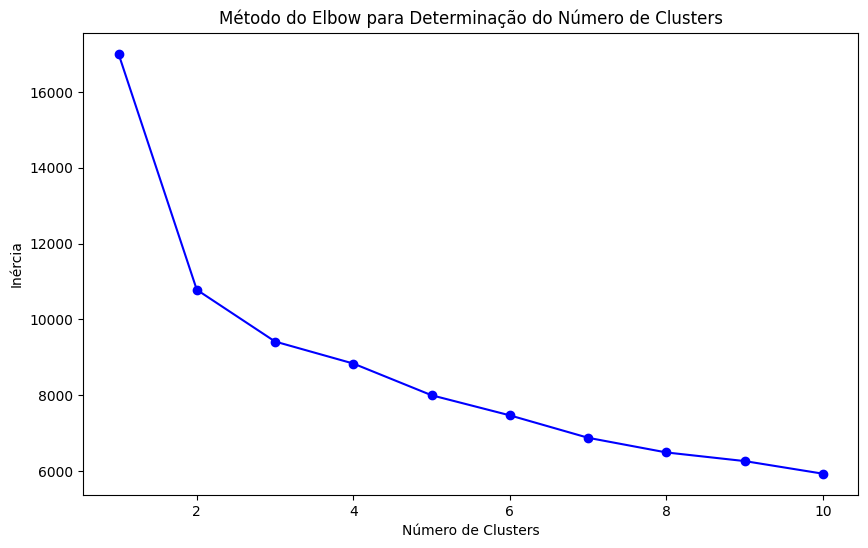

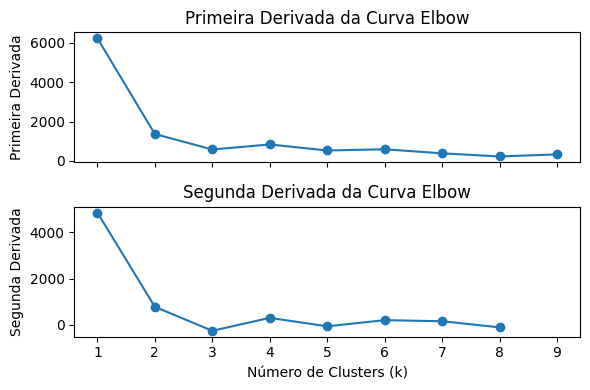

In [16]:
# Método do Elbow para determinar o número ideal de clusters
inertia = []
K_MAX = 10
for n_clusters in range(1, K_MAX+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0,n_init='auto')
    kmeans.fit(reduced_df)
    inertia.append(kmeans.inertia_)

# Plotar o método do Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, 'o-', color='blue',)
plt.title('Método do Elbow para Determinação do Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()


first_derivative = np.diff(np.array(inertia))
# Calcular a segunda derivada da curva Elbow
second_derivative = np.diff(first_derivative)

# Plotar a curva Elbow, a primeira derivada e a segunda derivada
fig, ax = plt.subplots(2, 1, figsize=(6, 4), sharex=True)

# Primeira derivada
ax[0].plot(range(1, K_MAX), 1-first_derivative, marker='o')
ax[0].set_title('Primeira Derivada da Curva Elbow')
ax[0].set_ylabel('Primeira Derivada')

# Segunda derivada
ax[1].plot(range(1, K_MAX-1), second_derivative, marker='o')
ax[1].set_title('Segunda Derivada da Curva Elbow')
ax[1].set_ylabel('Segunda Derivada')
ax[1].set_xlabel('Número de Clusters (k)')

plt.tight_layout()
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0,n_init='auto')
kmeans.fit(reduced_df)
clusters = kmeans.predict(reduced_df)

categorized_df = reduced_df.copy()
categorized_df['cluster'] = clusters

categorized_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,cluster
0,3.641755,-1.191393,-0.314560,-1.102901,-0.760226,-0.279697,-0.753125,1
1,-1.765722,1.175908,0.175492,0.022511,0.123686,0.039836,-0.013331,0
2,1.081699,0.758834,-0.558653,-0.081254,-0.065864,-0.410652,-0.530168,2
3,-2.008060,1.118161,-0.333327,-0.401316,0.038603,-0.030184,-0.102982,0
4,-0.129148,0.337528,1.874887,-0.396568,-0.166274,-0.306675,0.153858,0
...,...,...,...,...,...,...,...,...
2021,-1.889803,-1.473802,-0.672671,-0.337123,-0.855351,-0.040160,-0.060255,0
2022,2.852425,-0.916480,-0.600222,-0.571115,2.927808,1.672073,0.958429,1
2023,0.674295,0.180701,1.725925,1.169450,0.103490,-0.593968,0.516967,2
2024,0.919941,1.522676,-0.833384,0.226528,0.454616,0.061912,-0.447730,2


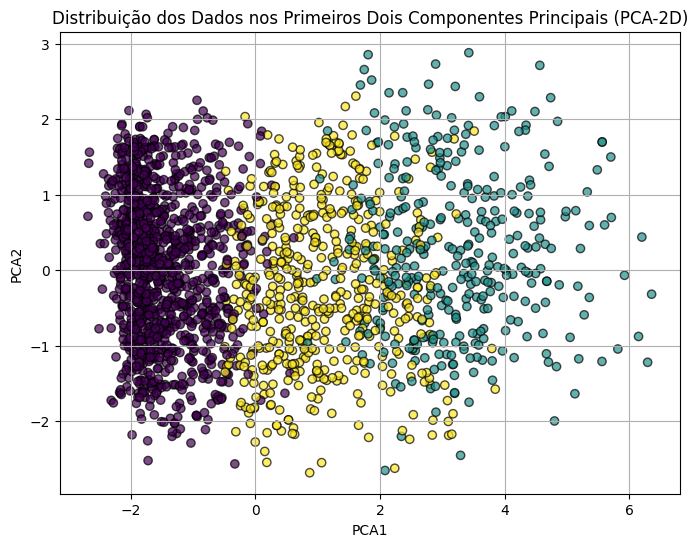

In [13]:
# Aplicar PCA para reduzir para 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(reduced_df)

# Criar DataFrame para os componentes principais
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Visualizar os primeiros dois componentes principais em 2D
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.7, edgecolors='k', c=clusters, cmap='viridis')

plt.title('Distribuição dos Dados nos Primeiros Dois Componentes Principais (PCA-2D)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()

In [14]:
# Aplicar PCA para reduzir para 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(reduced_df)

# Criar DataFrame para os componentes principais
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2', 'PCA3'])

# Visualizar os três primeiros componentes principais em 3D
fig = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='PCA3', title='Distribuição dos Dados nos Três Primeiros Componentes Principais (PCA-3D)',color=clusters)
fig.update_layout(scene=dict(
                    xaxis_title='PCA1',
                    yaxis_title='PCA2',
                    zaxis_title='PCA3'))
fig.show()

In [25]:
df['cluster'] = clusters
df_temp = df[df['cluster'] == 1]
df_temp

,Income,Recency,Seniority,Wines,Fruits,Meat,Fish,Sweets,Gold,cluster
0,58138,58,11.93,635,88,546,172,88,88,1
11,63033,82,10.73,194,61,480,225,112,30,1
27,84618,96,10.71,684,100,801,21,66,0,1
32,68657,4,11.46,482,34,471,119,68,22,1
38,80011,3,11.28,421,76,536,82,178,102,1
...,...,...,...,...,...,...,...,...,...,...
1990,82347,38,11.75,556,54,845,202,133,63,1
1999,73807,88,11.60,366,124,156,71,78,54,1
2001,61014,17,11.99,269,129,495,182,43,29,1
2006,88325,42,10.50,519,71,860,93,27,53,1


In [26]:
df_temp.describe()

,Income,Recency,Seniority,Wines,Fruits,Meat,Fish,Sweets,Gold,cluster
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.0
mean,75021.325843,46.247191,11.159242,543.738764,87.011236,453.634831,124.446629,91.912921,85.595506,1.0
std,12349.603940,29.306359,0.577562,287.450095,50.726718,248.853804,64.079044,52.943454,60.115376,0.0
min,31907.000000,0.000000,10.110000,6.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.0
25%,68685.500000,20.000000,10.635000,329.500000,43.750000,248.500000,75.000000,45.000000,37.000000,1.0
50%,75600.000000,46.000000,11.245000,506.000000,81.000000,427.000000,119.000000,91.000000,69.000000,1.0
75%,81876.000000,70.000000,11.670000,739.500000,127.500000,616.000000,175.500000,133.250000,121.250000,1.0
max,160803.000000,99.000000,12.020000,1493.000000,199.000000,1622.000000,259.000000,262.000000,249.000000,1.0
